<>:70: SyntaxWarning: invalid escape sequence '\c'
<>:70: SyntaxWarning: invalid escape sequence '\c'
C:\Users\pleal\AppData\Local\Temp\ipykernel_20592\1566013239.py:70: SyntaxWarning: invalid escape sequence '\c'
  label=f'Contorno al {100*prob_level:.0f}% ($\chi^2={chi2_crit_val:.3f}$)',


--- Ejercicio 4.2 (c) ---

Valores propios de Sigma: [2.3660254 0.6339746]
Vectores propios de Sigma:
[[ 0.88807383 -0.45970084]
 [ 0.45970084  0.88807383]]

Para el contorno al 25%:
  Valor crítico chi-cuadrado (prob=0.25, df=2): 0.575
  Semilongitud eje mayor: 1.167
  Semilongitud eje menor: 0.604

Para el contorno al 50%:
  Valor crítico chi-cuadrado (prob=0.50, df=2): 1.386
  Semilongitud eje mayor: 1.811
  Semilongitud eje menor: 0.937

Para el contorno al 75%:
  Valor crítico chi-cuadrado (prob=0.75, df=2): 2.773
  Semilongitud eje mayor: 2.561
  Semilongitud eje menor: 1.326


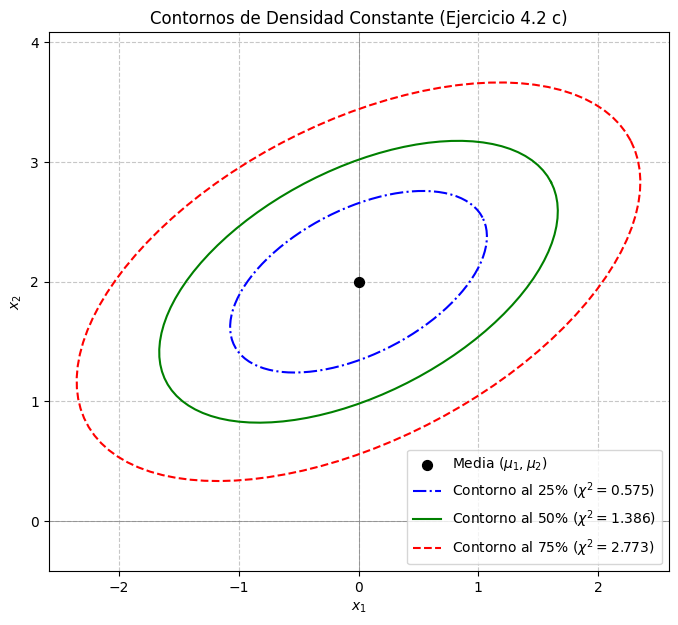


El centro de todas las elipses es: (0, 2)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# --- Solución para el Ejercicio 4.2 (c) ---
print("--- Ejercicio 4.2 (c) ---")

# Parámetros de la distribución normal bivariada
mu1 = 0
mu2 = 2
sigma11 = 2
sigma22 = 1
rho12 = 0.5

mu_vector = np.array([mu1, mu2])
sigma12 = rho12 * np.sqrt(sigma11) * np.sqrt(sigma22)
Sigma_matrix = np.array([[sigma11, sigma12],
                         [sigma12, sigma22]])

# Necesitamos los valores propios y vectores propios de Sigma para dibujar las elipses orientadas
eigenvalues, eigenvectors = np.linalg.eig(Sigma_matrix)
print(f"\nValores propios de Sigma: {eigenvalues}")
print(f"Vectores propios de Sigma:\n{eigenvectors}")

# Ángulos para parametrizar las elipses
theta = np.linspace(0, 2 * np.pi, 100)

# Graficar las elipses
plt.figure(figsize=(8, 7))
plt.title('Contornos de Densidad Constante (Ejercicio 4.2 c)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.scatter(mu_vector[0], mu_vector[1], color='black', label='Media ($\\mu_1, \\mu_2$)', s=50, zorder=5)

probabilities_to_plot = [0.25, 0.50, 0.75] # Probabilidades a encerrar
colors = ['blue', 'green', 'red']
linestyles = ['-.', '-', '--']

for i, prob_level in enumerate(probabilities_to_plot):
    alpha = 1 - prob_level # alpha es la probabilidad fuera del contorno
    chi2_crit_val = chi2.ppf(prob_level, df=2) # Usamos prob_level directamente para ppf

    # Semilongitudes de los ejes
    # Aseguramos que los valores propios se usen consistentemente para el eje mayor y menor
    # El valor propio mayor corresponde al eje más largo
    idx = eigenvalues.argsort()[::-1] # Índices para ordenar de mayor a menor
    ev_sorted = eigenvalues[idx]
    evec_sorted = eigenvectors[:,idx]

    a_axis = np.sqrt(ev_sorted[0] * chi2_crit_val)
    b_axis = np.sqrt(ev_sorted[1] * chi2_crit_val)

    # Coordenadas de la elipse en el sistema de sus ejes principales
    ellipse_x_rotated = a_axis * np.cos(theta)
    ellipse_y_rotated = b_axis * np.sin(theta)

    # Rotar la elipse
    ellipse_points = np.dot(evec_sorted, np.array([ellipse_x_rotated, ellipse_y_rotated]))

    # Trasladar la elipse al centro mu
    ellipse_x = ellipse_points[0, :] + mu_vector[0]
    ellipse_y = ellipse_points[1, :] + mu_vector[1]

    plt.plot(ellipse_x, ellipse_y,
             label=f'Contorno al {100*prob_level:.0f}% ($\chi^2={chi2_crit_val:.3f}$)',
             color=colors[i],
             linestyle=linestyles[i])
    print(f"\nPara el contorno al {100*prob_level:.0f}%:")
    print(f"  Valor crítico chi-cuadrado (prob={prob_level:.2f}, df=2): {chi2_crit_val:.3f}")
    print(f"  Semilongitud eje mayor: {a_axis:.3f}")
    print(f"  Semilongitud eje menor: {b_axis:.3f}")


plt.legend()
plt.axis('equal') # Para que la elipse no se vea distorsionada
plt.show()

print(f"\nEl centro de todas las elipses es: ({mu1}, {mu2})")



--- Ejercicio 4.23 (a) ---


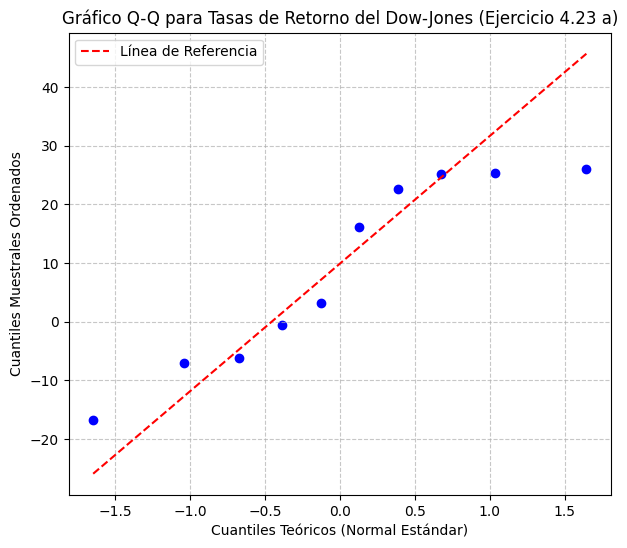


Gráfico Q-Q usando statsmodels (más estándar):


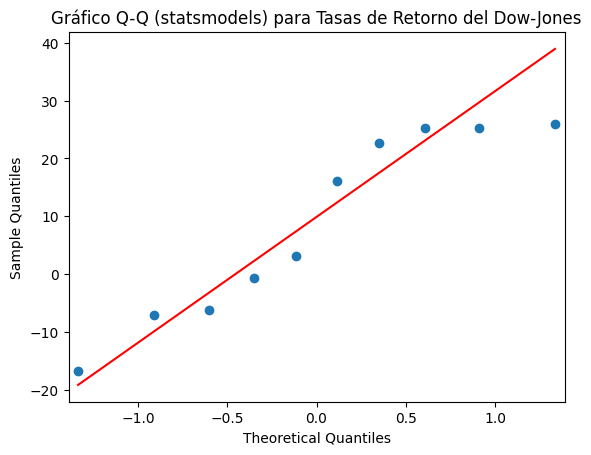


Datos ordenados y cuantiles calculados:
j= 1, x_(1)= -16.8, p_j=0.05, q_(1)=-1.645
j= 2, x_(2)=  -7.1, p_j=0.15, q_(2)=-1.036
j= 3, x_(3)=  -6.2, p_j=0.25, q_(3)=-0.674
j= 4, x_(4)=  -0.6, p_j=0.35, q_(4)=-0.385
j= 5, x_(5)=   3.1, p_j=0.45, q_(5)=-0.126
j= 6, x_(6)=  16.1, p_j=0.55, q_(6)= 0.126
j= 7, x_(7)=  22.6, p_j=0.65, q_(7)= 0.385
j= 8, x_(8)=  25.2, p_j=0.75, q_(8)= 0.674
j= 9, x_(9)=  25.3, p_j=0.85, q_(9)= 1.036
j=10, x_(10)=  26.0, p_j=0.95, q_(10)= 1.645


In [6]:


# --- Solución para el Ejercicio 4.23 (a) ---
print("\n--- Ejercicio 4.23 (a) ---")

# Datos del Dow-Jones
data_dow_jones = np.array([-0.6, 3.1, 25.3, -16.8, -7.1, -6.2, 16.1, 25.2, 22.6, 26.0])
n = len(data_dow_jones)

# 1. Ordenar los datos
data_sorted = np.sort(data_dow_jones)

# 2. Calcular las probabilidades pj = (j - 0.5) / n
p_j = (np.arange(1, n + 1) - 0.5) / n

# 3. Calcular los cuantiles normales estándar q(j) = Phi^-1(pj)
q_j = norm.ppf(p_j)

# Graficar el Q-Q plot usando matplotlib directamente
plt.figure(figsize=(7, 6))
plt.scatter(q_j, data_sorted, color='blue')
plt.title('Gráfico Q-Q para Tasas de Retorno del Dow-Jones (Ejercicio 4.23 a)')
plt.xlabel('Cuantiles Teóricos (Normal Estándar)')
plt.ylabel('Cuantiles Muestrales Ordenados')
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir una línea de referencia (opcional, pero útil)
# Se puede ajustar una línea a los puntos, o simplemente la línea y=x si los datos estuvieran estandarizados
# Aquí graficaremos una línea que pase por los cuantiles 25 y 75
q1_sample, q3_sample = np.percentile(data_sorted, [25, 75])
q1_normal, q3_normal = norm.ppf([0.25, 0.75])
slope = (q3_sample - q1_sample) / (q3_normal - q1_normal)
intercept = q1_sample - slope * q1_normal
x_line = np.array([np.min(q_j), np.max(q_j)])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, color='red', linestyle='--', label='Línea de Referencia')
plt.legend()
plt.show()

# También podemos usar statsmodels para un Q-Q plot más estándar
print("\nGráfico Q-Q usando statsmodels (más estándar):")
fig_qq = sm.qqplot(data_dow_jones, line='q') # 'q' ajusta la línea a los cuantiles
plt.title('Gráfico Q-Q (statsmodels) para Tasas de Retorno del Dow-Jones')
plt.show()

print("\nDatos ordenados y cuantiles calculados:")
for i in range(n):
    print(f"j={i+1:2d}, x_({i+1})={data_sorted[i]:6.1f}, p_j={p_j[i]:.2f}, q_({i+1})={q_j[i]:6.3f}")
